In [1]:
#import various packages
import sys
import scipy
import numpy #computational operations and arrays
import matplotlib #plotting
import pandas #handle datasets
import sklearn #get machine learning packages
import seaborn


In [2]:
# Set up packages, different arguments from following libraries
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import model_selection
import sklearn.model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
#create a dataframe, reads through file and create column of names 
df = pd.read_csv("breastCancerdata.csv")

In [25]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [26]:
# will give you overview of the different columns being observed (i.e. 
# clump thickness)
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

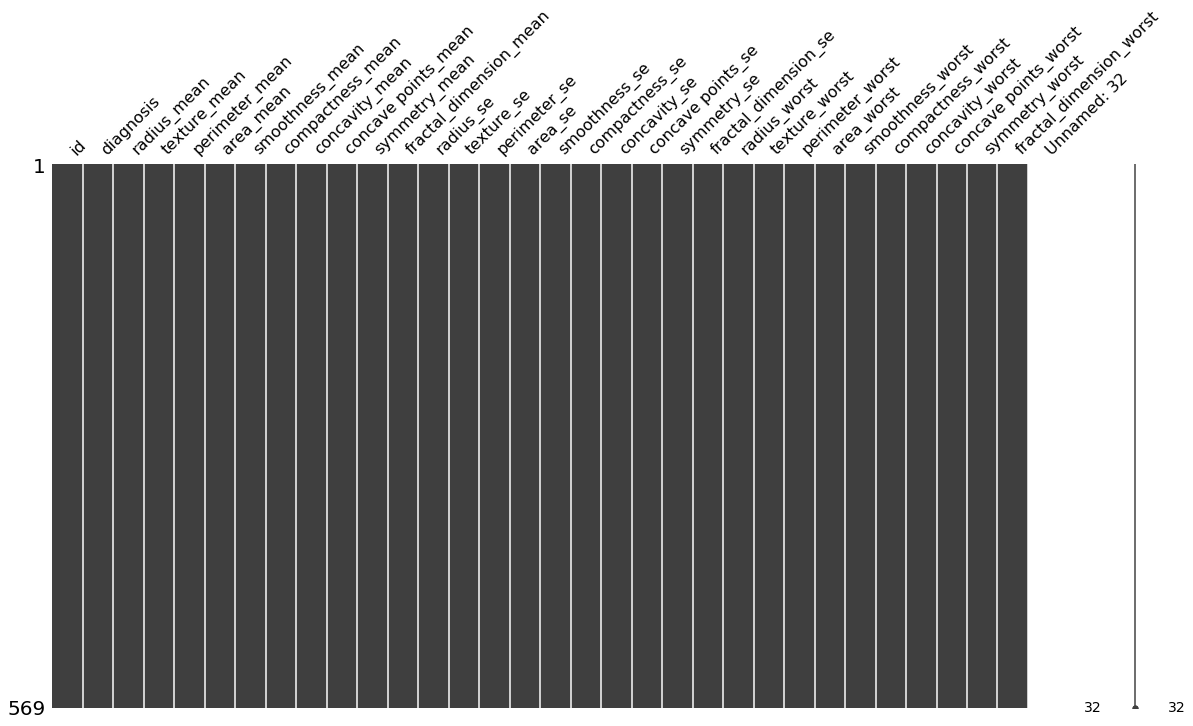

In [6]:
# Preprocess the data

import missingno #visualize missing patterns in data

missingno.matrix(df, figsize = (20, 10))

In [7]:
del df['Unnamed: 32']
del df['id']

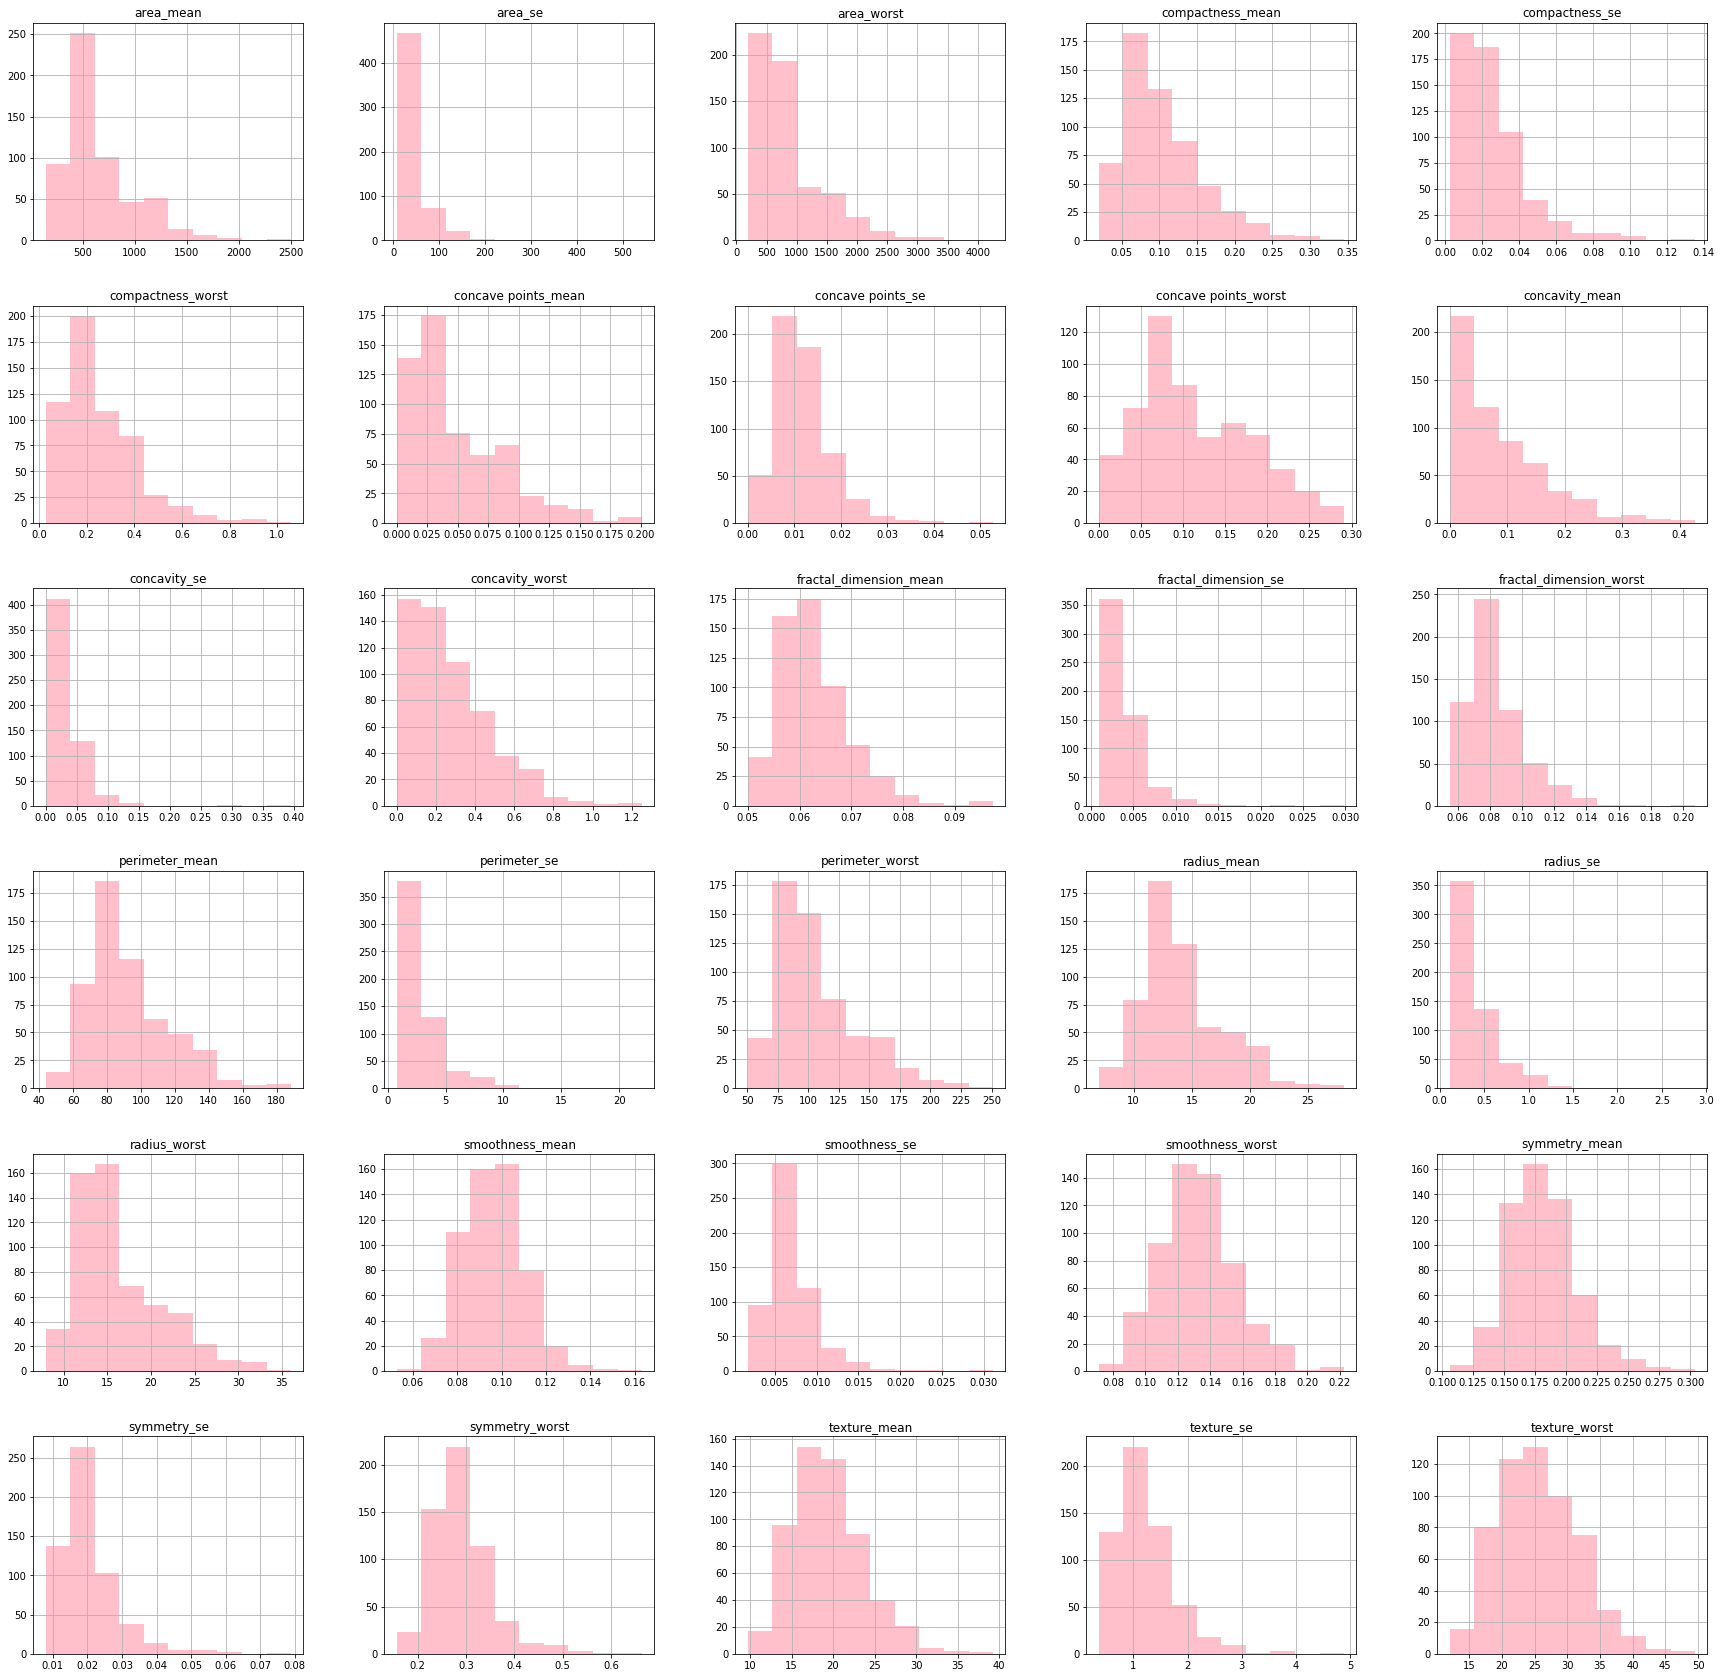

In [8]:
# Plot histograms for each variable

df.hist(figsize = (30,30), color = 'pink')
plt.show()

In [9]:
# One Hot Encodes all labels before Machine Learning
one_hot_cols = df.columns.tolist()
dataset_bin_enc = pd.get_dummies(df, columns=one_hot_cols)

dataset_bin_enc.head()

# Label Encode all labels
dataset_con_enc = df.apply(LabelEncoder().fit_transform)

dataset_con_enc.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1          370             1             455        452   
1          1          426           186             486        513   
2          1          406           324             478        487   
3          1           98           297             164         95   
4          1          418            60             493        506   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              444               531             521                  526   
1              120               215             321                  396   
2              403               459             478                  516   
3              471               533             507                  493   
4              332               414             480                  492   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0            416  ...           425             41              497   
1            219  ...           419            199              465   
2            348  ...           399            261              455   
3            426  ...           215            298              281   
4            216  ...           381             28              453   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0         516               358                516              520   
1         511               158                210              278   
2         491               287                464              438   
3         194               408                524              511   
4         470               239                245              415   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                   483             485                      506  
1                   401             222                      375  
2                   468             445                      361  
3                   479             499                      533  
4                   363              81                      216  

[5 rows x 31 columns]

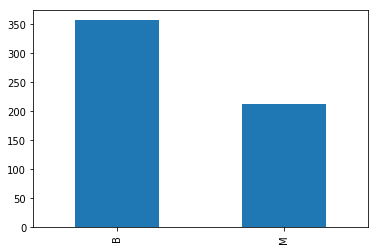

In [10]:
pd.value_counts(df['diagnosis']).plot.bar()

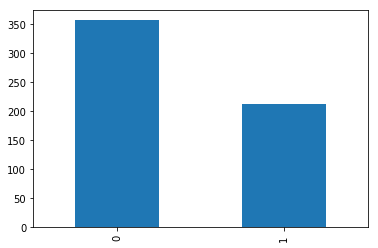

In [11]:
pd.value_counts(dataset_con_enc['diagnosis']).plot.bar()

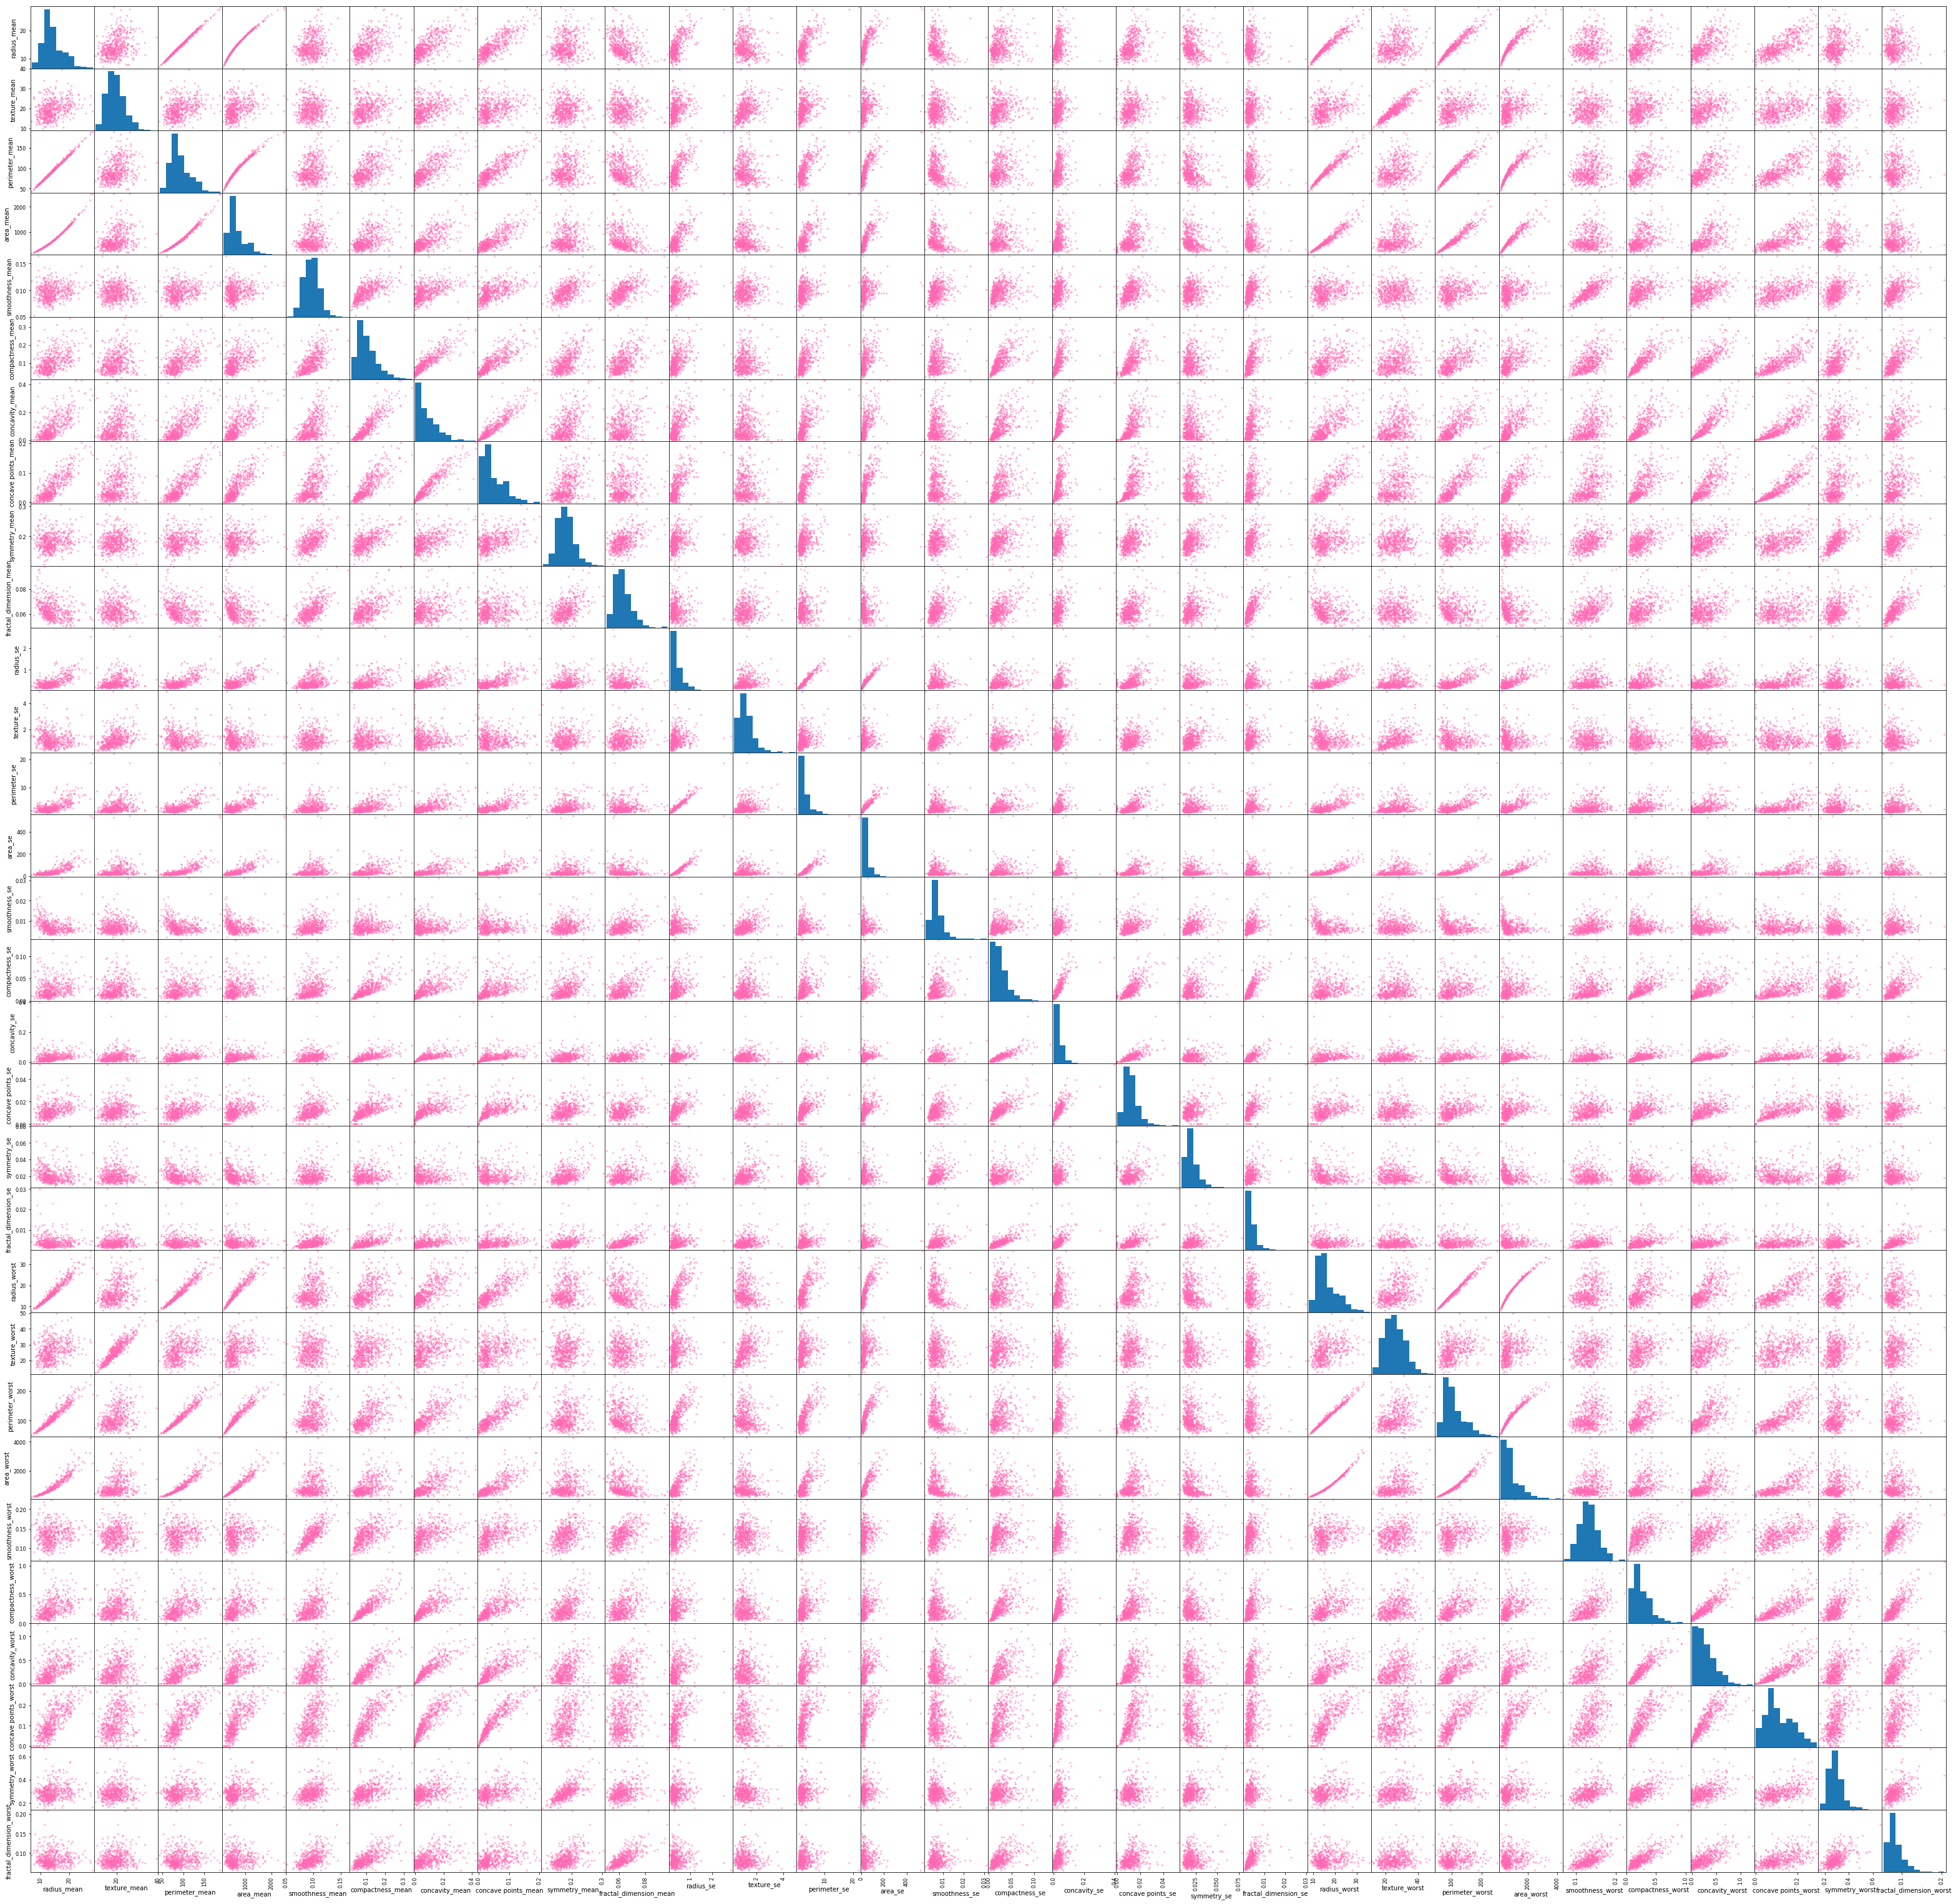

In [12]:
# Create a scatter plot matrix
# Scatter plot matrix is used to determine relationships
# between variables


scatter_matrix(df, figsize = (55,55), color = 'hotpink')
plt.show()

In [13]:
dataset_con_enc.corr().round(decimals =2).style.background_gradient(cmap = 'PuRd')

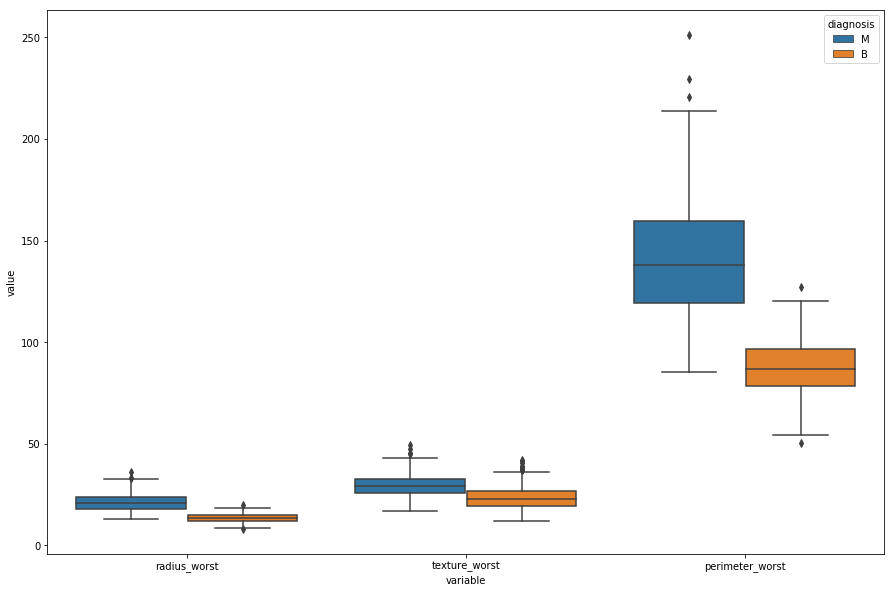

In [17]:
melted_data = pd.melt(df,id_vars = "diagnosis",value_vars = ['radius_worst', 'texture_worst', 'perimeter_worst'])
plt.figure(figsize = (15,10))
seaborn.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [18]:
px.scatter_matrix(df, dimensions = ["radius_worst", "area_worst", "perimeter_worst"], color = "diagnosis")

In [19]:
# Create X and Y datasets for training
# split data in order to prepare it for training, using numPy
X = np.array(df.drop(['diagnosis'],1))
y = np.array(df['diagnosis'])

# train_test_split split arrays or matrices into random train and test subsets
    # X (array- like): The data to fit. Can be for example a list, or an array.
    # y (array- like): The target variable to try to predict in the case of supervised learning
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [20]:
# Testing options
seed = 8 # adding a seed will make a data reproducible, 
         # adding random seed which will change results little bit 
         # each time
scoring = 'accuracy'

In [21]:
# Define models to train 
models = [] #create empty list in order to add KNN model
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5))) #add KNN 
                                                              #model, explore num of neighbors
models.append(('SVM', SVC()))

# Evaluate each model in turn

#gets results and names
results = []
names = []

# create a for loop for each of models defined previously

for name, model in models:
    
    # k fold training will take place and will run 10 times, 
    # giving the average accuracy for each of them
    # we do not want a random state so we go from seed
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    
    # model_selection.cross_val_score evaluates a score by cross- validation
    # paramaters of model_selection.cross_val_score:
        # X (array- like): The data to fit. Can be for example a list, or an array.
        # y (array- like): The target variable to try to predict in the case of supervised learning
        # groups (array- like, with shape): group labels for the samples used while splitting the 
        #dataset into train/test set
        # scoring (string): A string (see model evaluation documentation) 
        #or a scorer callable object / function with signature scorer(estimator, X, y)
        #which should return only a single value (Similar to cross_validate but only a single metric is permitted)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, 
                                                 cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.931884 (0.024809)
SVM: 0.641739 (0.066126)


In [22]:
# Make predictions on validation dataset

for name, model in models: 
    # we will do the model.fit, and it will train it once again on the X and y 
    #training data. Since we want to make predictions, we're going to use the 
    #model to actually make a prediction about the X_test data
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Once the model has been trained, we're going to use it to make a
    # prediction. It will print out the name, the accuracy score (based 
    # on a comparison of the y_test data with the predictions we made), 
    #and a classification_report, which will tell us information about the 
    #false positives and negatives that we found
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
    
#results of KNN and SVC

# precision: measure of false positives (ratio of correctly predicted po-
#sitive observations in total predicted positive observations) high value--> little false pos

# recall: measure of false negatives... some malignant cells going through KNN and getting through
#with no labels

# f-1 score: combo of precision and recall scores


KNN
0.9035087719298246
              precision    recall  f1-score   support

           B       0.91      0.92      0.92        65
           M       0.90      0.88      0.89        49

   micro avg       0.90      0.90      0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

SVM
0.5701754385964912
              precision    recall  f1-score   support

           B       0.57      1.00      0.73        65
           M       0.00      0.00      0.00        49

   micro avg       0.57      0.57      0.57       114
   macro avg       0.29      0.50      0.36       114
weighted avg       0.33      0.57      0.41       114

